In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
# Import usual Packages

In [2]:
# Read CSV File
climate = pd.read_csv("climate.csv")

In [3]:
# Get TMIN and Max values to scale by diving by 10
climate['Data_Value'] = climate['Data_Value'] /10

In [4]:
# sort values by date then reset index to create and ordering of dates we can then split before and after 2015
climate = climate.sort_values(by="Date").reset_index()

In [5]:
climate[climate.Date.apply(lambda x: x[:4] == "2015")].head(1)

,index,ID,Date,Element,Data_Value
145955,131960,USC00306774,2015-01-01,TMIN,-11.7


In [14]:
# Seperate to different dataframes for before and after 2015
climate_before_2015 = climate.loc[0:145954]
climate_after_2015 = climate.loc[145955:]

In [15]:
# Remove all Leap Year dates from dataFrame
climate_before_2015 = climate_before_2015[~climate_before_2015.Date.apply(lambda date: date[-5::] == "02-29" )]

In [17]:
# Create a series of dates that includes month-date matching the rows in our dataframe
group = climate_before_2015.Date.apply(lambda date: date[-5::])

In [18]:
# Groupby with individual dates of year we then use The Data Value Columns to create
# Aggregations for the min and max temperatures
min_max_climates_before_2015 = climate_before_2015.groupby(group)["Data_Value"].agg({"min": np.min, "max": np.max}).reset_index()

In [19]:
# do the exact same to our dataframe of dates after 2015
group = climate_after_2015.Date.apply(lambda date: date[-5::])
min_max_climates_after_2015 = climate_after_2015.groupby(group)["Data_Value"].agg({"min": np.min, "max": np.max}).reset_index()

In [21]:
# Create a dataframe of the lowest temperatures of 2015 that were lower than years 2005-2015
highest_mins = min_max_climates_after_2015[min_max_climates_after_2015["min"] < min_max_climates_before_2015["min"]]["min"]

In [12]:
# Create a dataframe of the highest temperatures of 2015 that were lower than years 2005-2015
highest_maxes = min_max_climates_after_2015[min_max_climates_after_2015["max"] > min_max_climates_before_2015["max"]]["max"]

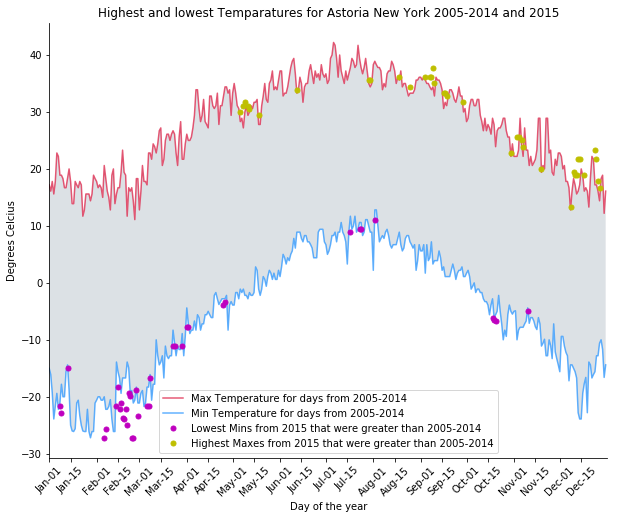

In [13]:
plt.figure(figsize=(10,8))
plt.plot(min_max_climates_before_2015["max"], "crimson", alpha=0.7,label="Max Temperature for days from 2005-2014")
plt.plot(min_max_climates_before_2015["min"], "dodgerblue", alpha=0.7, label="Min Temperature for days from 2005-2014")
plt.plot(highest_mins, "m.", label="Lowest Mins from 2015 that were greater than 2005-2014", markersize=10)
plt.plot(highest_maxes, "y.", label="Highest Maxes from 2015 that were greater than 2005-2014",markersize=10)

plt.gca().fill_between(min_max_climates_before_2015.index, 
                       min_max_climates_before_2015["max"], min_max_climates_before_2015["min"], 
                       facecolor='lightslategray', 
                       alpha=0.25)
ax = plt.gca()

#ax.yaxis.grid()
dates = pd.date_range("01/01/2018", end="12/31/2018", freq="SMS")

day_of_year_indexes = [date.dayofyear - 1 for date in dates]

plt.xticks(day_of_year_indexes, dates.strftime("%b-%d"), rotation=45)

# Remove right and top spines from our plot to make it look nicer
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Day of the year")
plt.ylabel("Degrees Celcius")
plt.title("Highest and lowest Temparatures for Astoria New York 2005-2014 and 2015")
plt.xlim(0,365)
plt.legend()
plt.show();